In [193]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

In [132]:

def create_data(n_samples,n_features):
    """
    The function creates linear synthetic data, with added noise to
    to simulate randomness
    """
    X = np.random.rand(n_samples, n_features) # we create random number in the desired dimension

    # we determine the true parameters of the created line by choosing a random integer between 1-10.
    w_true = np.random.randint(1, 10, size=(n_features,))
    b_true = np.random.randint(1, 10)

    # we generate the extra noise to give a randomness to the data

    noise = np.random.randn(n_samples) * 0.5  # normal noise with std=0.5

    # and with the help of previously created parameters we create the synthetic data 
    y = X @ w_true + b_true + noise  

    return X,y,w_true,b_true
    
    

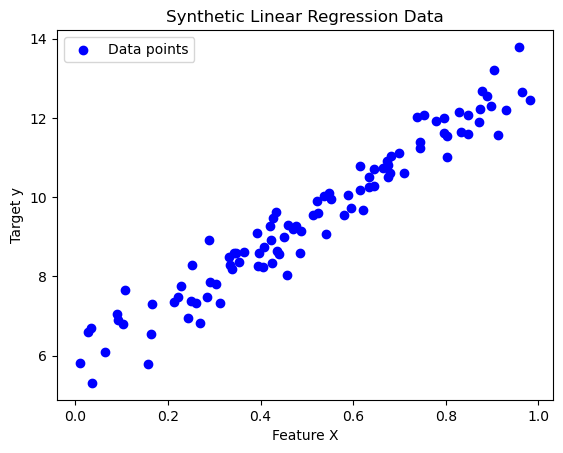

In [133]:
X,y,wt,bt = create_data(100,1)

# to check my work I have made a scatter plot about the newly created data.
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Synthetic Linear Regression Data')
plt.legend()
plt.show()

In [134]:
def Linear_regression(X,y):
    """
    This function calculates the optimal parameters for the line with the
    Normal Equation method
    """
    # we center the data
    X_tild = X - np.mean(X)
    y_tild = y - np.mean(y)

    # then we calculate the weights
    w = np.linalg.inv(X_tild.T @ X_tild) @ (X_tild.T @ y_tild)

    # and the bias
    b = np.mean(y) - np.mean(X, axis=0) @ w

    return w,b

In [135]:
def simulate_regression():
    """
    This function simulates linear regression on a randomly generated
    synthetic data
    """
    X,y,wt,bt = create_data(100,1)
    w,b = Linear_regression(X,y)
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X,w*X+b, color = "red")
    print(f"The original weight and bias was: {wt[0]}, {bt}")
    print(f"The weight and bias we got from the regression: {round(w[0],2)},{round(b,2)}")
    return None


The original weight and bias was: 1, 3
The weight and bias we got from the regression: 0.99,2.97


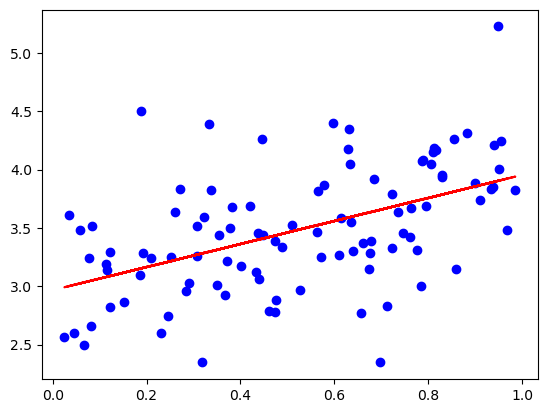

In [136]:
simulate_regression()

### Gradient descent method

In [170]:
def simulate_gradient_descent(lr=0.01, n_iters=1000):
    X,y,wt,bt = create_data(100,1)
    n_samples, n_features = X.shape
    epsilon = 1e-6 # we build in an automatic break, so the iteration stops below a certain threshold
    
    # we set the starting values for the parameters
    w = np.zeros(n_features)
    b = 0.0
    
    losses = []  # we create a list to track the cahnges in the loss function
    
    for i in range(n_iters): #we start our iteration
        # make a prediction with our parameters
        y_pred = X @ w + b
        
        # calculate the error between the prediction and the true outputs
        error = y_pred - y
        
        # defining the gradients, as shown in 4.2.3
        dw = (2/n_samples) * (X.T @ error)
        db = (2/n_samples) * np.sum(error) # numerically, the dot product of the all-ones vector with the residual vector is equivalent to taking the sum of the residuals.
        
        # we update our parameters
        w -= lr * dw
        b -= lr * db
        
        # and compute the mean square error
        loss = (1/n_samples) * np.sum(error**2)
        losses.append(loss)

        if i > 0 and abs(losses[-1] - losses[-2]) < epsilon:
            print(f"Converged at iteration {i}")
            break
    

    # in the first plot we show the loss curve to demonstrate how it is changing over the iterations.
    plt.semilogy(losses) # chananged to a logarithmic view, so that we can observer the magnitude of change more closely.
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.title("Gradient Descent Convergence")
    plt.show()

    # and in the second plot we show the predicted linear model, over the synthetic data.
    plt.scatter(X, y, label="Data")
    plt.plot(X, X @ w + b, color="red", label="Fitted Line")
    plt.legend()
    plt.show()


    print(f"The original weight and bias was: {wt[0]}, {bt}")
    print(f"The weight and bias we got from the regression: {round(w[0],2)},{round(b,2)}")

    return None

Converged at iteration 208


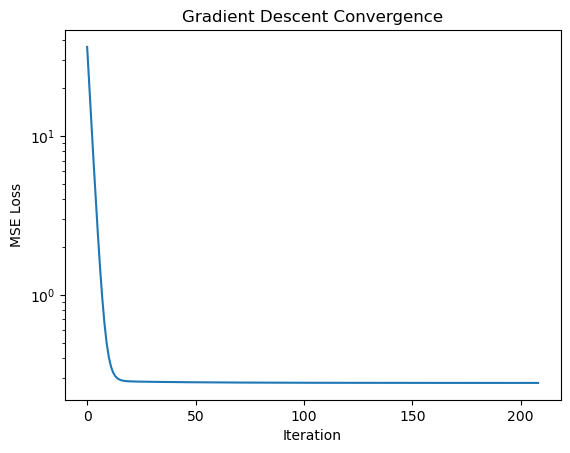

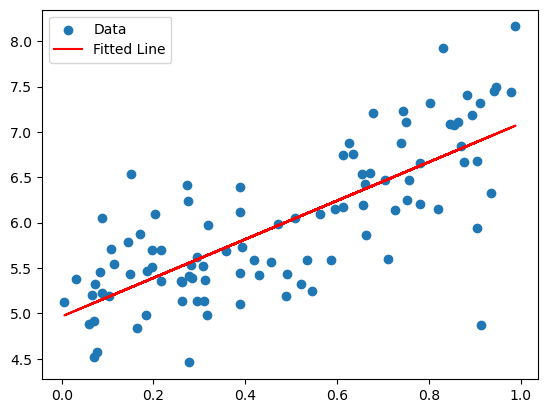

The original weight and bias was: 2, 5
The weight and bias we got from the regression: 2.13,4.97


In [169]:
simulate_gradient_descent(lr=0.1, n_iters=1000)


# 2D regression

#### Using the normal equation

In [197]:
def simulate_regression_2d():
    """
    This function simulates linear regression on a randomly generated
    synthetic data in 2D.
    """
    X,y,wt,bt = create_data(100,2)
    w,b = Linear_regression(X,y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # we make a scatter plot with the datapoints
    ax.scatter(X[:,0], X[:,1], y, color='blue')

    # and create a grid to plot the regression plane
    x1_grid, x2_grid = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 10),
                                np.linspace(X[:,1].min(), X[:,1].max(), 10))
    y_grid = w[0]*x1_grid + w[1]*x2_grid + b

    
    ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

    plt.show()
    print(f"The original weight and biases was: w(1) = {wt[0]} w(2) = {wt[1]}, b = {bt}")
    print(f"The weight and bias we got from the regression: w(1) = {round(w[0],2)}, w(2) = {round(w[1],2)} , b = {round(b,2)}")
    return None

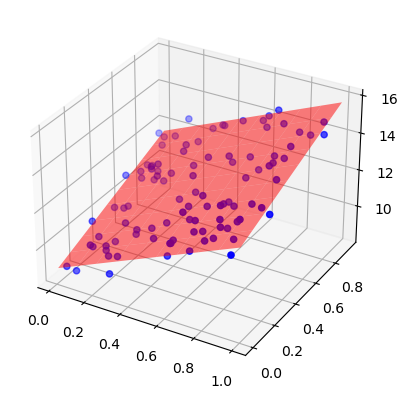

The original weight and biases was: w(1) = 4 w(2) = 3, b = 9
The weight and bias we got from the regression: w(1) = 4.17, w(2) = 2.92 , b = 8.83


In [198]:
simulate_regression_2d()


In [191]:
def simulate_gradient_descent_2d(lr=0.01, n_iters=1000):
    X, y, wt, bt = create_data(100, 2)  # we have upgraded to two features
    n_samples, n_features = X.shape
    epsilon = 1e-6  

    
    w = np.zeros(n_features)
    b = 0.0

    losses = []

    for i in range(n_iters):
        y_pred = X @ w + b
        error = y_pred - y

        dw = (2/n_samples) * (X.T @ error)
        db = (2/n_samples) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        loss = (1/n_samples) * np.sum(error**2)
        losses.append(loss)

        if i > 0 and abs(losses[-1] - losses[-2]) < epsilon:
            print(f"Converged at iteration {i}")
            break

    
    plt.semilogy(losses)
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.title("Gradient Descent Convergence")
    plt.show()

    # upgraded the plotting function, so it can now facilitate a 3D plot
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:,0], X[:,1], y, color='blue', label='Data points')

   
    x1_grid, x2_grid = np.meshgrid(
        np.linspace(X[:,0].min(), X[:,0].max(), 10),
        np.linspace(X[:,1].min(), X[:,1].max(), 10)
    )
    y_grid = w[0]*x1_grid + w[1]*x2_grid + b

    ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Target")
    plt.show()

    print(f"The original weight and bias were: {wt}, {bt}")
    print(f"The weight and bias from regression: {w}, {b}")


Converged at iteration 3099


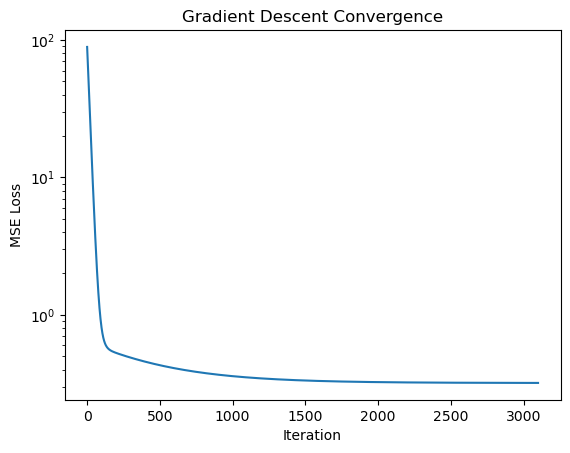

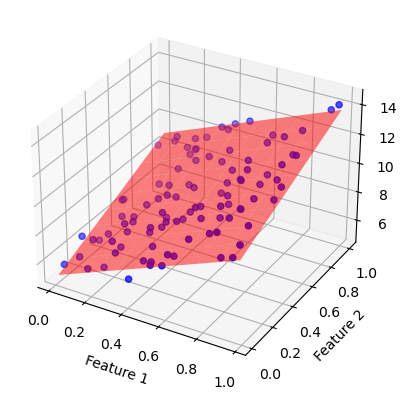

The original weight and bias were: [5 4], 5
The weight and bias from regression: [5.02567487 3.88883027], 4.999501360143997


In [190]:
simulate_gradient_descent_2d(lr=0.01, n_iters=10000)

## Animation

In [ ]:
def animate_gradient_descent_gif(lr=0.01, n_iters=700, filename="gradient_descent.gif", step=5):
    """
    Animate gradient descent for 2D linear regression.

    step: how many iterations to skip between frames
    """
    # we create the first plot with the inicialized parameters
    X, y, wt, bt = create_data(100, 2)
    n_samples, n_features = X.shape

    w = np.zeros(n_features)
    b = 0.0

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x1_grid, x2_grid = np.meshgrid(
        np.linspace(X[:,0].min(), X[:,0].max(), 10),
        np.linspace(X[:,1].min(), X[:,1].max(), 10)
    )


    # by updating the fram we basically perform one step in the iteration process.
    def update(frame_idx):
        nonlocal w, b
        
        for _ in range(step):
            y_pred = X @ w + b
            error = y_pred - y
            dw = (2/n_samples) * (X.T @ error)
            db = (2/n_samples) * np.sum(error)
            w -= lr * dw
            b -= lr * db

        ax.clear()
        ax.scatter(X[:,0], X[:,1], y, color='blue')
        y_grid = w[0]*x1_grid + w[1]*x2_grid + b
        ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Target')
        ax.set_title(f"Iteration {frame_idx*step}")

    total_frames = n_iters // step
    anim = FuncAnimation(fig, update, frames=total_frames, interval=50)

    writer = PillowWriter(fps=10)
    anim.save(filename, writer=writer)
    print(f"Animation saved as {filename}")
    plt.close(fig)


In [215]:
animate_gradient_descent_gif(lr=0.01, n_iters=700, filename="gradient_descent.gif")


Animation saved as gradient_descent.gif
